<a href="https://colab.research.google.com/github/RonnyGuevara/Digital-image-processing/blob/main/TP2/Pr%C3%A1ctica_2_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 2:  Color y espacios cromáticos, manipulación de la luminancia y saturación

##Presentado por: Ronny Guevara

## Objetivo General
Manipulación independiente de la luminancia y saturación de una imagen
## Objetivos Específicos
*   Conocer las librerías imageio, numpy y matplotlib.pyplot 
*   Conversión de espacios RGB y YIQ mediante matrices
*   Análisis de una imagen en diferentes paletas de colores


## Descripción del práctico:
Las actividades son:

*   Manipulación independiente de la luminancia y saturación de una imagen
*   Visualización de la imagen en diferentes paletas de colores



###Manipulación independiente de la luminancia y saturación de una imagen
#### 1. Importación de librerías

In [578]:
import imageio as io
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import OrderedDict

cmaps = OrderedDict()

####2. Funciones

In [579]:
#Función que permite leer un imagen sin limitación de UNIT8
def get_image(rute):
  image = io.imread(rute)
  image = image.astype(np.int)
  return image

#Función que permite plotear la imagen
def plot_image(image, Imagen, cmap=None):
  fig, ax = plt.subplots(dpi=85)
  ax.imshow(image, cmap=cmap)
  ax.set_title(Imagen)
  plt.axis('off')
  plt.show()

#Función que permite plotear la imagen
def plot2_image(image,Imagen, cmap=None):
  plt.figure(figsize=(100,100)) 
  plt.figure()
  plt.title(Imagen)
  plt.imshow(image,cmap=cmap)
  plt.colorbar()
  plt.grid(False)
  plt.show()

#Información de la imagen
def image_info(image):
  print('This image is', image.dtype)
  print('with dimensions', image.shape)

####3. Drive en el trabajo
Incluido el drive en el trabajo se procede a leer las imagenes, permitiendo al usuario seleccionar la imagen que desee

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


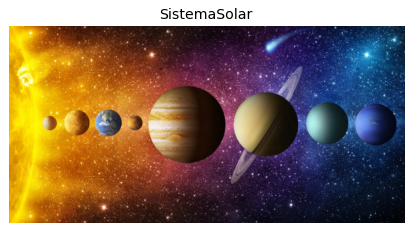

In [580]:
from google.colab import drive
drive.mount('/content/drive')
#@title Selecciona la imagen. { run: "auto" }
Loro='/content/drive/MyDrive/Colab Notebooks/loro.jpg'
RadiacionSolar='/content/drive/MyDrive/Colab Notebooks/RadiacionSolar.jpg'
SistemaSolar='/content/drive/MyDrive/Colab Notebooks/SisSolar.jpg'
Imagen = 'SistemaSolar' #@param ["Loro", "RadiacionSolar", "SistemaSolar"]

if Imagen == 'Loro':
  image = get_image(Loro)
  plot_image(image, 'Loro')
elif Imagen == 'RadiacionSolar':
  image = get_image(RadiacionSolar)
  plot_image(image, 'RadiacionSolar')
elif Imagen == 'SistemaSolar':
  image = get_image(SistemaSolar)
  plot_image(image, 'SistemaSolar')

####4. Conversión de espacios
Se utiliza 2 matrices para la transformación entre el espacio RGB y el espacio IAQ

In [581]:
matrixYIQ=np.array([[0.299,0.587,0.144],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
matrixRGB=np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])

####5. Visualización
Para graficar las imagenes correspondientes se hace uso de la librería matplotlib.pyplot y se muestra:

1.   Imagen Original 
2.   Imagen normalizada [0,1] en el espacio RGB
3.   Imagen transformada al espacio YIQ
4.   Imagen resultante producto de la manipulación de la luminancia y saturación

<Figure size 7200x7200 with 0 Axes>

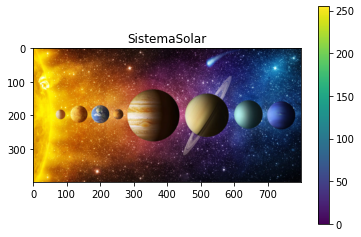

This image is int64
with dimensions (400, 800, 3)


In [582]:
#Imagen Original
imagen=plot2_image(image, Imagen)
image_info(image)

<Figure size 7200x7200 with 0 Axes>

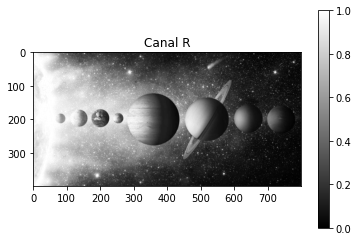

<Figure size 7200x7200 with 0 Axes>

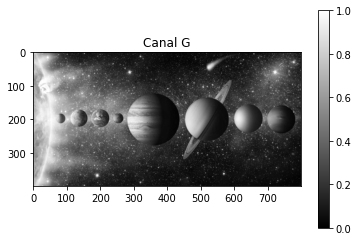

<Figure size 7200x7200 with 0 Axes>

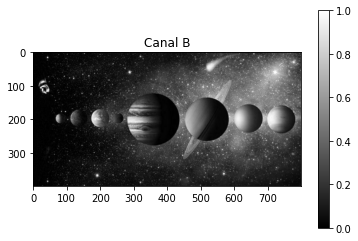

In [583]:
#Normalización de la imagen (0,1)
imagecopy=np.copy(image) #Copia de la imagen original
work_image=imagecopy/255 

#Visualización de las componente RGB normalizadas en escala de grises
plot2_image(work_image[:,:,0], "Canal R", cmap='gray')
plot2_image(work_image[:,:,1], "Canal G", cmap='gray')
plot2_image(work_image[:,:,2], "Canal B", cmap='gray')


<Figure size 7200x7200 with 0 Axes>

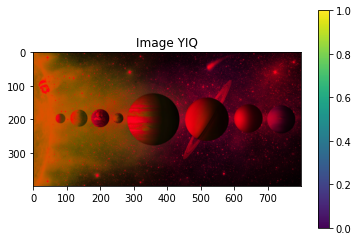

In [584]:
#Conversión del espacio RGB a YIQ
YIQ=np.dot(work_image,matrixYIQ)
YIQ=np.clip(YIQ,0,1)
plot2_image(YIQ, 'Image YIQ')

Se utiliza un botón scroll para que el usuario seleccione el valor de ØY y/o ßIQ, siendo:

*   ØY: coeficiente de luminancia
*   ßIQ: coeficiente de saturación

Los coeficientes seleccionados son almacenados en una matriz

<Figure size 7200x7200 with 0 Axes>

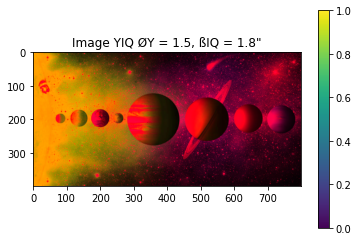

In [585]:
ØY = 1.5 #@param {type:"slider", min:-2, max:2, step:0.1}
ßIQ = 1.8 #@param {type:"slider", min:-2, max:2, step:0.1}
matrixcoeff=np.array([[ØY,0,0],[0,ßIQ,0],[0,0,ßIQ]]) #Matriz de coeficientes

#Cambio de luminancia y/o saturación de la imagen
YIQ=np.copy(YIQ)
YIQ=np.clip(YIQ,0,1)
YIQ2=np.dot(YIQ,matrixcoeff)
YIQ2=np.clip(YIQ2,0,1)
plot2_image(YIQ2, f'Image YIQ ØY = {str(ØY)}, ßIQ = {str(ßIQ)}"')


<Figure size 7200x7200 with 0 Axes>

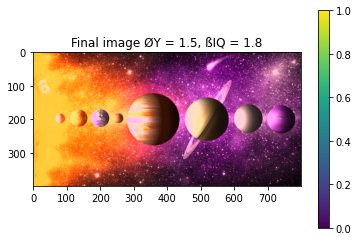

In [586]:
#Transformación del espacio YIQ a espacio RGB
final_image=np.dot(YIQ2,matrixRGB)
final_image=np.clip(final_image,0,1)
plot2_image(final_image,f"Final image ØY = {str(ØY)}, ßIQ = {str(ßIQ)}")

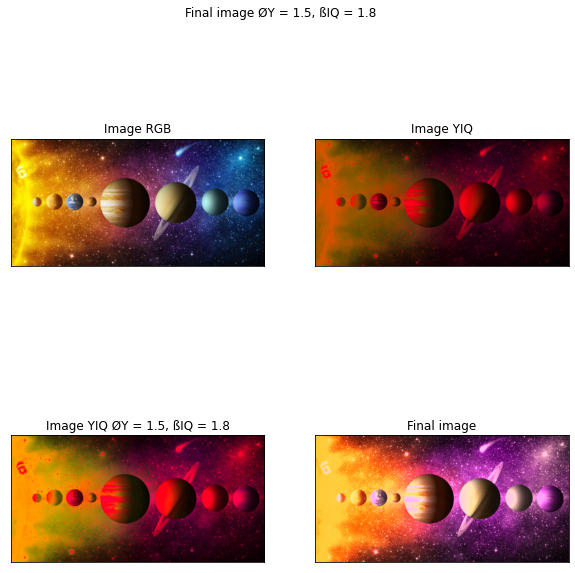

In [587]:
titles=['Image RGB', 'Image YIQ', f'Image YIQ ØY = {str(ØY)}, ßIQ = {str(ßIQ)}', 'Final image']
images=[work_image, YIQ,YIQ2, final_image]
plt.figure(figsize=(10,10))
plt.tight_layout()

for i in range (4):
  
  plt.subplot(2,2, i+1)
  plt.imshow(images[i])
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])

plt.suptitle(f"Final image ØY = {str(ØY)}, ßIQ = {str(ßIQ)}")
plt.show()

####6. Análisis de los resultados:
El trabajo práctico permite el ingreso de los coeficientes de luminancia y saturación por parte del usuario, si el coeficiente de luminancia es mayor a 1 el brillo de la imagen aumenta, mientras que, si el coeficiente es menor a 1 el brillo disminuye.
El coeficiente de saturación permite manipular la pureza del color dentro de la imagen, si el coeficiente es igual a cero la imagen se convierte a escala de grises.
Se debe tener cuidado al realizar la alteración en la imagen y verificar que cada pixel se encuentre comprendido en el rango (0,1)

###Visualización de la imagen en diferentes paletas de colores

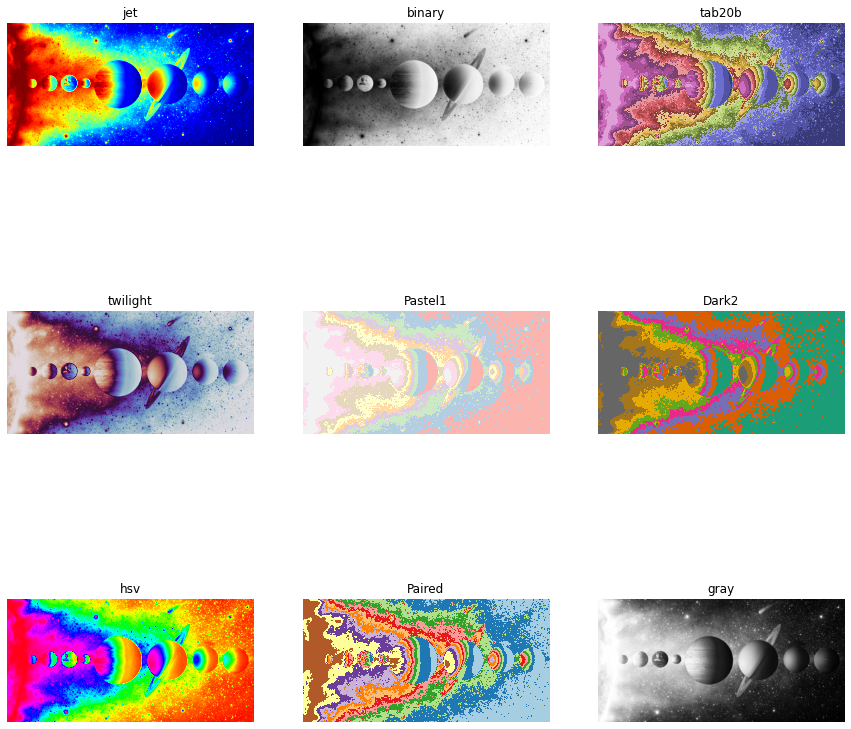

In [588]:
imagegray=work_image[:,:,0]

fig,axes=plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(15,15))
cmaps=['jet', 'binary', 'tab20b', 'twilight', 'Pastel1', 'Dark2', 'hsv','Paired','gray']

for ax, cmap in zip(axes.flat, cmaps):
  
  ax.imshow(imagegray, cmap=cmap)
  ax.set(title=cmap)
  ax.axis('off')

plt.show()

####Análisis de los resultados:


*   Se debe tomar en cuenta que paleta es la adecuada para visualizar detalles dentro de la imagen que no pueden ser apreciadas a simple vista por el usuario
*   Es importante saber interpretar la escala de la paleta seleccionada, como se puede apreciar en la imagen del Sistema Solar, la paleta JET permite visualizar a detalle la intensidad de calor radiada por el sol y recibida por cada planeta, mientas más lejano se encuentre el planeta del sol menos intensidad de calor recibe, pasando del rojo al azul.
